<a href="https://colab.research.google.com/github/tawaqalt/tawaqalt/blob/main/insurance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **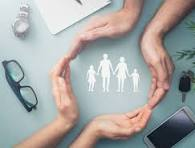**

## **Insurance data analysis**

About the dataset: The insurance dataset consist of the information about subscribers to health insurance like their gender, whether they smoke or not, their BMI and other metrics. We want to know the relationships between their lifestyle habits, weight and other factors and how it affects their insurance premium

# **Importing libraries**



In [7]:
#overview of the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('insurance 1.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **Exploratory Data Analysis**

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
data = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

the duplicated values are removed

Data Processing

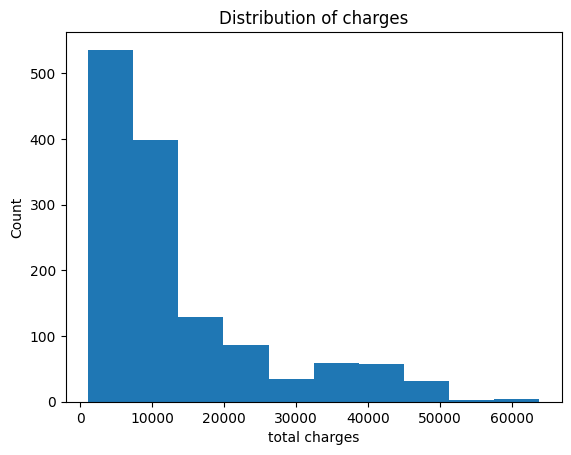

In [10]:
plt.hist(df['charges'])
plt.title('Distribution of charges')
plt.xlabel('total charges')
plt.ylabel('Count')
plt.show()

from  the visualization we can see that the charges is left skewed and this shows that the average charge is higher than the median
---



<ipython-input-11-8f3d7cffbe13>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


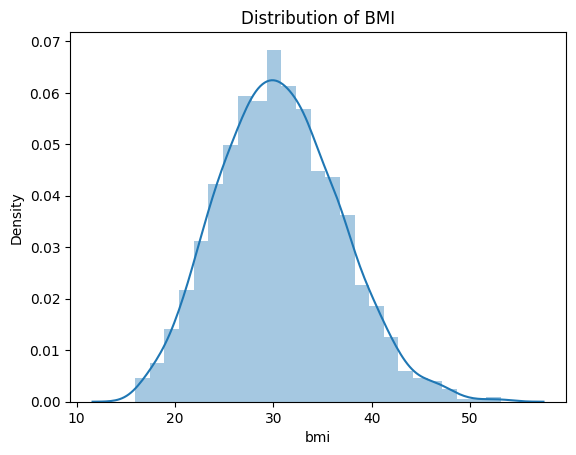

In [11]:
#bmi Distribution
sns.distplot(df['bmi'])
plt.title('Distribution of BMI')
plt.show()

based on the visualization we can see that the BMI is normally distributed

Text(0.5, 1.0, 'Detecting Outliers of charges')

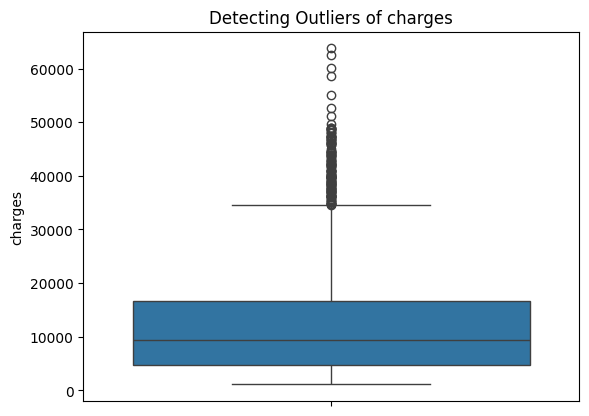

In [12]:
sns.boxplot(df['charges'])
plt.title('Detecting Outliers of charges')


the average charge is higher than the median

Does the number of children affect the smoking habits of the person?

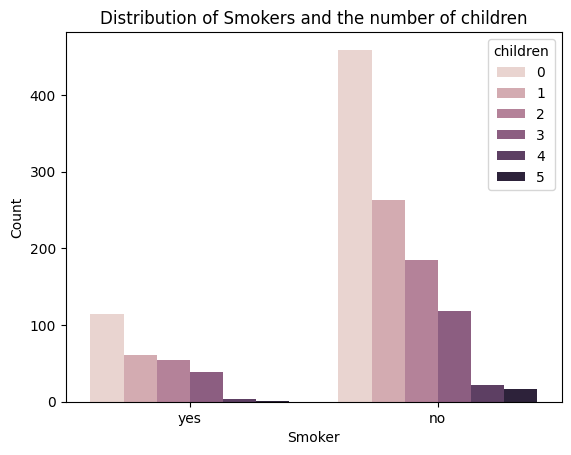

In [13]:
# the
sns.countplot(x='smoker', hue='children', data=df)
plt.title('Distribution of Smokers and the number of children')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

the visiualization shows that people without kids have a higher rate of smoking

what is the distribution of smokers vs non-smokers

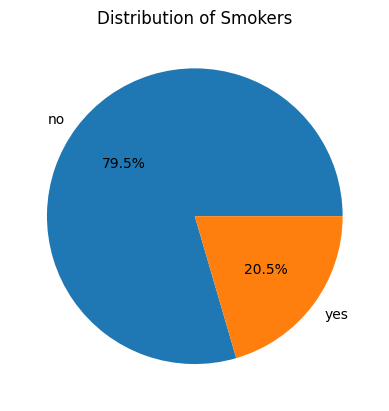

In [14]:
smokers = df['smoker'].value_counts()
plt.pie(smokers, labels=smokers.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

Does the age affect the BMI?

From the visualization we can see that the older the person, the higher the BMI

Does the BMI affect the Charges?

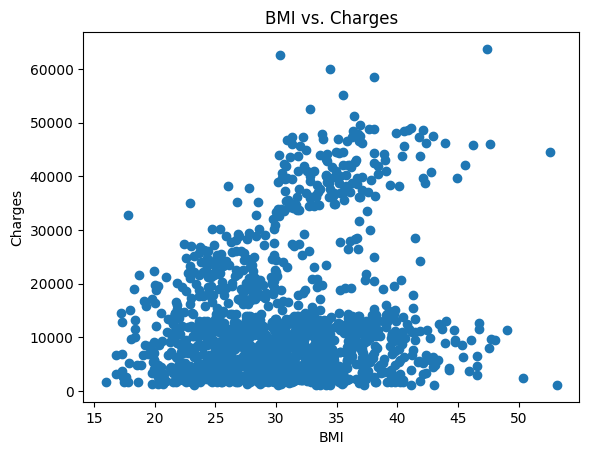

In [ ]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

Does the Region affect the Charges?

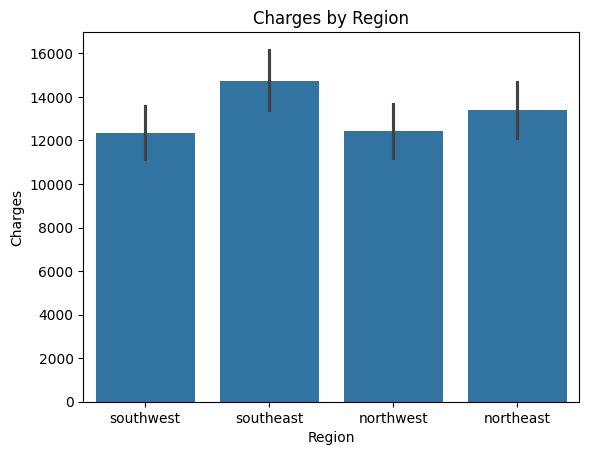

In [ ]:
#bar chart of region
sns.barplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [ ]:
df.corr()

<ipython-input-44-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


insights: the correlation between age and charges is negative and the correlation between bmi and charges is positive and this shows that the higher the age, the lower the charges and the higher the bmi, the higher the charges. this also shows that the higher the number of children, the higher the charges.

What is the correlation between the dataset?

Heat map of the correlation matrix

<ipython-input-46-5f1c574e7c14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


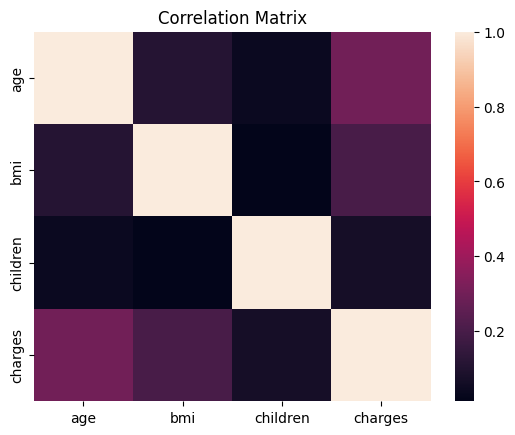

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()

he heatmap suggests that as age increases, insurance charges also tend to increase. This could be because older individuals are often at a higher risk for health issues compared to younger individuals, leading to higher insurance premiums.

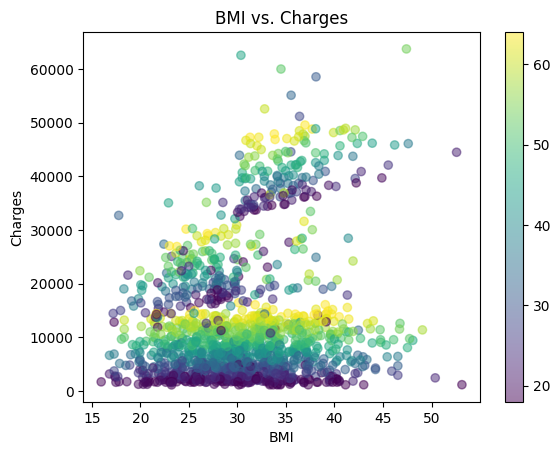

In [ ]:
x= df['bmi']
y= df['charges']
color = df['age']

plt.scatter(x, y, c=color, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()


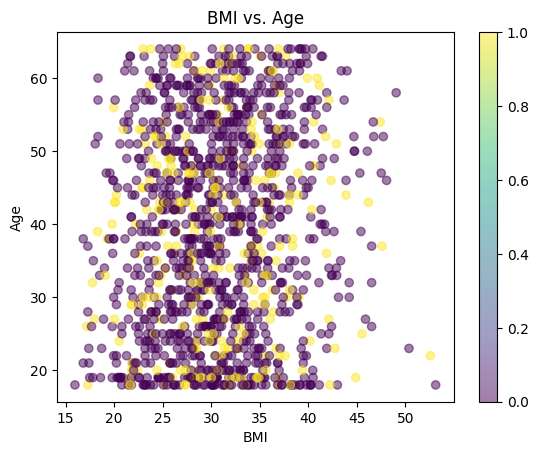

In [ ]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
x = df['bmi']
y = df['age']
legend = df['smoker']

plt.scatter(x, y, c=legend, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs. Age')
plt.show()

Conclusion:
* there is a positive correlation between BMI and charges which also shows that the higher the age, the higher the charges and the higher the bmi, the higher the charges.
* there is a higher percentage of non-smokers than smokers.
* the number of children affects the smoking habits of the person i.e people without kids have a higher rate of smoking.
* the age and the BMI are positively correlated which also shows that the older the person, the higher the BMI
* the number of children does not affect the charges.
* smokers have a higher charges than non-smokers




## **Recommendations:**

the smokers should be more concerned about the charges and try to reduce their smoking habits.
some of the customers should adopt healthy food habits so that they can reduce their charges.